In [1]:
# Import required libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix

/Users/troycassels/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cd /Users/troycassels/Documents

/Users/troycassels/Documents


In [3]:
# Set file path to import files from
file_path = "Documents"

In [4]:
# Read CSV file into a dataframe
df = pd.read_csv(Path("tweets.csv"))

/var/folders/ds/yr__0mv52qg383xz2bm8ycbw0000gn/T/ipykernel_70828/1014142445.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path("tweets.csv"))


In [5]:
# Drop NA records
df = df.dropna()

In [6]:
# Remove Tweets that do not mention ChatGPT in the tweets
df = df[df["text"].str.contains("ChatGPT | chatgpt | #chatGPT | #chatgpt")==True]

In [7]:
# Review dataframe
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Math_Maniac,ChatGPT does ascii art\n#ChatGPT https://t.co/...,"Decatur, GA",I work with a number of tools. Right now it's ...,2020-07-20 14:24:50+00:00,467.0,1233.0,49216,False,2023-04-02 13:44:07+00:00,['ChatGPT'],Twitter Web App
1,SmashKoders,#ChatGPT is funny sometimes 😅 https://t.co/cSa...,Mumbai,My life changed while debugging code 😊,2022-06-18 04:34:18+00:00,8.0,126.0,239,False,2023-04-02 13:43:46+00:00,['ChatGPT'],Twitter Web App
2,Andreas Illenseer,Let’s put it in graphic terms. Drawing a #Unic...,"Mainz, Deutschland",Specialized in Regulatory & Digital Intelligen...,2017-10-31 19:35:24+00:00,63.0,188.0,88,False,2023-04-02 13:43:36+00:00,['Unicorn'],Twitter for iPhone
9,Myindianow,ChatGPT will not replace people. But people wh...,"Pune, India",🇮🇳,2022-03-02 03:02:43+00:00,14.0,33.0,52,False,2023-04-02 13:40:23+00:00,"['ChatGPT', 'OpenAI', 'AIart']",Twitter for Android
10,Rob,Italy banning open source AI.. #ChatGPT https:...,"London, UK",tech for @theBHF 🚀 ❤️,2009-04-25 15:16:05+00:00,207.0,754.0,1124,False,2023-04-02 13:40:12+00:00,['ChatGPT'],Twitter for iPhone


In [8]:
# Review sample record
df.iloc[0]

user_name                                                 Math_Maniac
text                ChatGPT does ascii art\n#ChatGPT https://t.co/...
user_location                                             Decatur, GA
user_description    I work with a number of tools. Right now it's ...
user_created                                2020-07-20 14:24:50+00:00
user_followers                                                  467.0
user_friends                                                   1233.0
user_favourites                                                 49216
user_verified                                                   False
date                                        2023-04-02 13:44:07+00:00
hashtags                                                  ['ChatGPT']
source                                                Twitter Web App
Name: 0, dtype: object

In [9]:
# Clean-up date formats
df["user_created"] =df["user_created"].apply(lambda x: pd.Timestamp(x).timestamp())
df["date"] =df["date"].apply(lambda x: pd.Timestamp(x).timestamp())

In [10]:
# Run vader sentiment analysis on tweets
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/troycassels/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Run vader sentiment analysis on tweets
df['scores']=df['text'].apply(lambda body: sia.polarity_scores(str(body)))

In [12]:
# Run vader sentiment analysis on tweets
def vader_scores(text, category):
    return vader.polarity_scores(text).get(category)

vader = SentimentIntensityAnalyzer()

df["Negative_Score"] = df.apply(lambda row : vader_scores(df["text"][row.name], "neg"),axis=1)
df["Neutral_Score"] = df.apply(lambda row : vader_scores(df["text"][row.name], "neu"),axis=1)
df["Positive_Score"] = df.apply(lambda row : vader_scores(df["text"][row.name], "pos"),axis=1)
df["Compound_Score"] = df.apply(lambda row : vader_scores(df["text"][row.name], "compound"),axis=1)


In [13]:
# Classify vader outputs as positive, negative and neutral
df["positive"] = np.where(df["Compound_Score"] >= 0.05 , 1, 0)
df["negative"] = np.where(df["Compound_Score"] <= - 0.05 , 1, 0)
df["neutral"] = np.where((df["positive"] + df["negative"] == 0), 1, 0)

In [14]:
# Drop Neutral reocords
df = df[df.neutral != 1]

In [15]:
# Review dataframe
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,scores,Negative_Score,Neutral_Score,Positive_Score,Compound_Score,positive,negative,neutral
1,SmashKoders,#ChatGPT is funny sometimes 😅 https://t.co/cSa...,Mumbai,My life changed while debugging code 😊,1.655527e+09,8.0,126.0,239,False,1.680443e+09,['ChatGPT'],Twitter Web App,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.000,0.580,0.420,0.4404,1,0,0
2,Andreas Illenseer,Let’s put it in graphic terms. Drawing a #Unic...,"Mainz, Deutschland",Specialized in Regulatory & Digital Intelligen...,1.509479e+09,63.0,188.0,88,False,1.680443e+09,['Unicorn'],Twitter for iPhone,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.000,0.857,0.143,0.7574,1,0,0
11,VALIPOKKANN • 𝑵𝑭𝑻.𝑵𝒀𝑪 𝟐𝟑,"Good morning, world! Starting *chatgpt stuck h...",VALIPOKKANN.ETH.co,|| avant garde 🌏 கலைஞர் || new account 🙃||,1.659953e+09,733.0,369.0,31198,False,1.680443e+09,['ChatGPT'],Twitter Web App,"{'neg': 0.201, 'neu': 0.683, 'pos': 0.117, 'co...",0.201,0.683,0.117,-0.2714,0,1,0
12,Anthony Hadfield Ph.D.,#GPT4 #ChatGPT #OpenAI #ArtificialIntelligence...,"St Petersburg, FL","I have studied CompSci, AI, RL, LA, Vision, Py...",1.457680e+09,26.0,15.0,291,False,1.680443e+09,"['GPT4', 'ChatGPT', 'OpenAI', 'ArtificialIntel...",Twitter Web App,"{'neg': 0.157, 'neu': 0.637, 'pos': 0.205, 'co...",0.157,0.637,0.205,0.5041,1,0,0
13,Ines Hegedus-Garcia,Join us at Leveraging Generative AI &amp; Chat...,Miami,Architectural REALTOR at Avanti Way Realty pas...,1.175280e+09,14174.0,3351.0,1564,False,1.680443e+09,"['AI', 'ChatGPT']",Twitter for iPhone,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.000,0.855,0.145,0.2960,1,0,0


In [16]:
# Review sample record
df.iloc[0]

user_name                                                 SmashKoders
text                #ChatGPT is funny sometimes 😅 https://t.co/cSa...
user_location                                                  Mumbai
user_description               My life changed while debugging code 😊
user_created                                             1655526858.0
user_followers                                                    8.0
user_friends                                                    126.0
user_favourites                                                   239
user_verified                                                   False
date                                                     1680443026.0
hashtags                                                  ['ChatGPT']
source                                                Twitter Web App
scores              {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...
Negative_Score                                                    0.0
Neutral_Score       

In [17]:
# Review datatypes
df.dtypes

user_name            object
text                 object
user_location        object
user_description     object
user_created        float64
user_followers       object
user_friends         object
user_favourites      object
user_verified        object
date                float64
hashtags             object
source               object
scores               object
Negative_Score      float64
Neutral_Score       float64
Positive_Score      float64
Compound_Score      float64
positive              int64
negative              int64
neutral               int64
dtype: object

In [18]:
# Create a dataframe with non-categorical X inputs
X_not_categorical = df[["user_created","user_followers","user_friends","user_favourites"]]
X_not_categorical.head()

,user_created,user_followers,user_friends,user_favourites
1,1.655527e+09,8.0,126.0,239
2,1.509479e+09,63.0,188.0,88
11,1.659953e+09,733.0,369.0,31198
12,1.457680e+09,26.0,15.0,291
13,1.175280e+09,14174.0,3351.0,1564


In [19]:
# Create a dataframe with categorical X inputs
X_categorical_exc_location = df[["user_verified","source"]]
X_categorical_exc_location.head()

,user_verified,source
1,False,Twitter Web App
2,False,Twitter for iPhone
11,False,Twitter Web App
12,False,Twitter Web App
13,False,Twitter for iPhone


In [20]:
# Create a new dataframe using get dummies to convert categorical inputs into binary values
X_categorical_exc_location = pd.get_dummies(X_categorical_exc_location)
X_categorical_exc_location.head()

,user_verified_False,user_verified_True,user_verified_False,user_verified_True,source_AI Assistant,source_AI In Plain English,source_AI Social Post,source_ANews Twitter,source_AYappTesting,source_Admin Kuvira Crypto Bot,...,source_tweetmonk.com,source_twefed,source_twitter-app503,source_twitterDemoTest3,source_twitterLisaHunter,source_twitter_com_flume,source_twitto_be_bot,source_usetwype,source_vassbots,source_vijay ds project
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Concatenate non-categorical and the get dummies cetgorical dataframes.  This is the X input to models.
X = pd.concat([X_not_categorical, X_categorical_exc_location], axis=1)
X.head()

,user_created,user_followers,user_friends,user_favourites,user_verified_False,user_verified_True,user_verified_False,user_verified_True,source_AI Assistant,source_AI In Plain English,...,source_tweetmonk.com,source_twefed,source_twitter-app503,source_twitterDemoTest3,source_twitterLisaHunter,source_twitter_com_flume,source_twitto_be_bot,source_usetwype,source_vassbots,source_vijay ds project
1,1.655527e+09,8.0,126.0,239,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.509479e+09,63.0,188.0,88,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1.659953e+09,733.0,369.0,31198,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.457680e+09,26.0,15.0,291,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1.175280e+09,14174.0,3351.0,1564,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Create y dataframe based on positive column.  Negative is 0 or not-positive
y = df["positive"]

In [23]:
# Review y dataframe
y.head()

1     1
2     1
11    0
12    1
13    1
Name: positive, dtype: int64

In [24]:
# Review X dataframe
X.head()

,user_created,user_followers,user_friends,user_favourites,user_verified_False,user_verified_True,user_verified_False,user_verified_True,source_AI Assistant,source_AI In Plain English,...,source_tweetmonk.com,source_twefed,source_twitter-app503,source_twitterDemoTest3,source_twitterLisaHunter,source_twitter_com_flume,source_twitto_be_bot,source_usetwype,source_vassbots,source_vijay ds project
1,1.655527e+09,8.0,126.0,239,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.509479e+09,63.0,188.0,88,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1.659953e+09,733.0,369.0,31198,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.457680e+09,26.0,15.0,291,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1.175280e+09,14174.0,3351.0,1564,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

In [28]:
# Instantiate a BalancedRandomForestClassifier instance
brf = BalancedRandomForestClassifier()

# Fit the model to the training data
brf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier()

In [29]:
# Predict labels for testing features
brf_predictions = brf.predict(X_test_scaled)

In [37]:
# Print the confusion matrix for balanced random forest data
confusion_matrix(y_test, brf_predictions)

array([[3121, 2080],
       [7640, 9840]])

In [38]:
# Print classification report for balanced random forest
print(classification_report(y_test, brf_predictions))

              precision    recall  f1-score   support

           0       0.29      0.60      0.39      5201
           1       0.83      0.56      0.67     17480

    accuracy                           0.57     22681
   macro avg       0.56      0.58      0.53     22681
weighted avg       0.70      0.57      0.61     22681



In [32]:
# Instantiate an AdaBoost instance
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [33]:
# Fit the model to the training data
model = abc.fit(X_train, y_train)

In [34]:
# Predict labels for testing features
y_pred = model.predict(X_test)

In [35]:
# Print the confusion matrix for AdaBoost data
confusion_matrix(y_test, y_pred)

array([[    9,  5192],
       [    4, 17476]])

In [39]:
# Print classification report for AdaBoost
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.00      0.00      5201
           1       0.77      1.00      0.87     17480

    accuracy                           0.77     22681
   macro avg       0.73      0.50      0.44     22681
weighted avg       0.75      0.77      0.67     22681



<BarContainer object of 466 artists>

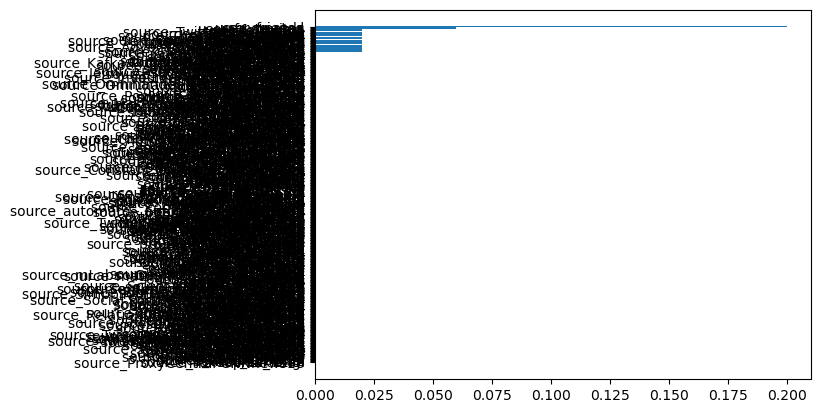

In [45]:
from sklearn.inspection import permutation_importance
sort = abc.feature_importances_.argsort()
plt.barh(X.columns[sort], abc.feature_importances_[sort])

AttributeError: 'BarContainer' object has no attribute 'ylabels'

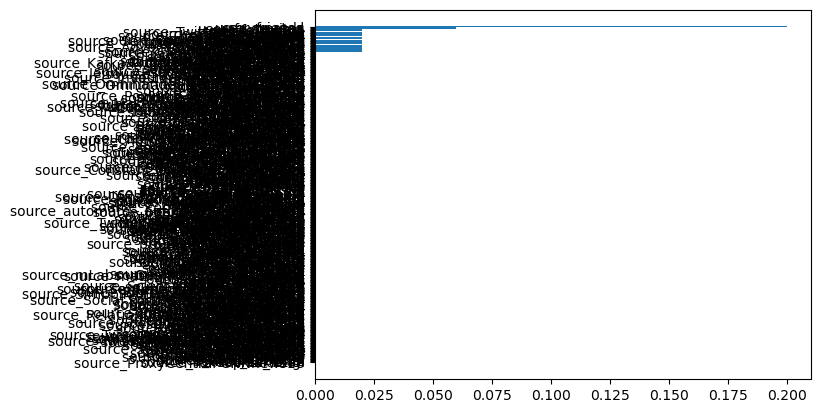

In [49]:
z = plt.barh(X.columns[sort], abc.feature_importances_[sort])
z.ylabels

In [46]:
sort

array([232, 313, 312, 311, 310, 309, 308, 307, 306, 305, 304, 303, 314,
       302, 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 289, 301,
       288, 315, 318, 342, 341, 340, 339, 338, 337, 336, 335, 334, 333,
       332, 316, 331, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320,
       319, 330, 287, 286, 285, 254, 253, 252, 251, 250, 249, 248, 247,
       246, 245, 244, 255, 243, 241, 240, 239, 238, 237, 236, 234, 464,
       231, 230, 229, 242, 256, 257, 258, 284, 283, 282, 281, 280, 279,
       278, 277, 276, 275, 274, 273, 272, 271, 270, 269, 268, 267, 266,
       265, 263, 262, 261, 260, 259, 343, 344, 345, 346, 433, 432, 431,
       430, 429, 428, 427, 426, 425, 424, 423, 434, 422, 420, 418, 417,
       416, 415, 414, 413, 412, 411, 410, 408, 421, 435, 436, 437, 463,
       462, 461, 460, 459, 458, 457, 456, 455, 454, 453, 452, 451, 450,
       449, 447, 446, 445, 444, 443, 442, 441, 440, 439, 438, 407, 228,
       406, 404, 371, 370, 369, 368, 367, 366, 365, 364, 363, 36